<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Applying_Clustering_Algorithm_based_on_Data_Characteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference_link: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans

K-means

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
url = 'http://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/fraud_trans_dataset.csv'
df = pd.read_csv(url)

X = df.drop(columns=['Is Fraudulent'])
y = df['Is Fraudulent']

X_0 = X[y == 0]
X_1 = X[y == 1]

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 4   # <-- set based on elbow visualization
n_clusters_1 = 3   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 7947 samples
Class 0 - Cluster 1: 7985 samples
Class 0 - Cluster 2: 1364 samples
Class 0 - Cluster 3: 5116 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 184 samples
Class 1 - Cluster 1: 1013 samples
Class 1 - Cluster 2: 25 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.'+str(i+1) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.'+str(i+1) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_0 = dbscan_0.fit_predict(X_0)

dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_1 = dbscan_1.fit_predict(X_1)

In [ ]:

unique_0, counts_0 = np.unique(sub_labels_0, return_counts=True)
for cluster, count in zip(unique_0, counts_0):
    print(f"Class 0 - Cluster {cluster}: {count} samples")

Class 0 - Cluster -1: 22412 samples


In [ ]:

unique_1, counts_1 = np.unique(sub_labels_1, return_counts=True)
for cluster, count in zip(unique_1, counts_1):
    print(f"Class 1 - Cluster {cluster}: {count} samples")

Class 1 - Cluster -1: 1222 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.' + str(i) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.' + str(i) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")

Hierarchical Clustering (also called Agglomerative Clustering)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

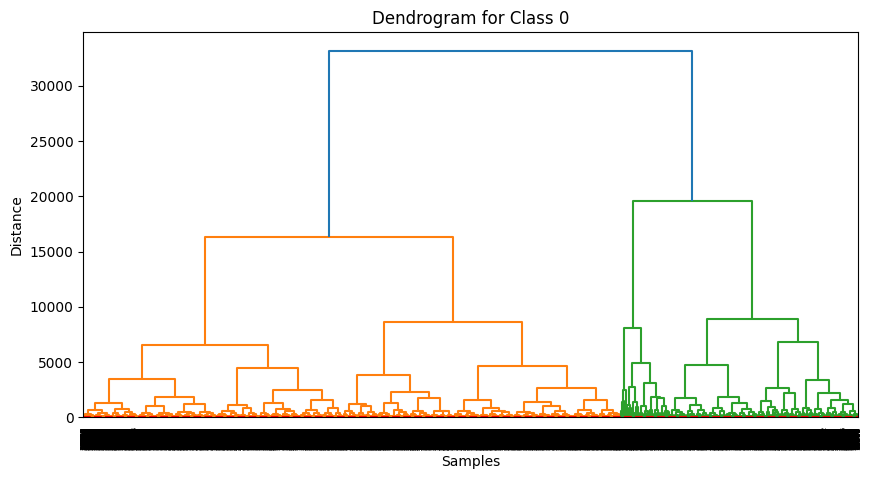

In [ ]:
# Generate linkage matrix for Class 0
Z = linkage(X_0, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Class 0")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()


In [ ]:
Z = linkage(X_0, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")


Number of clusters: 4


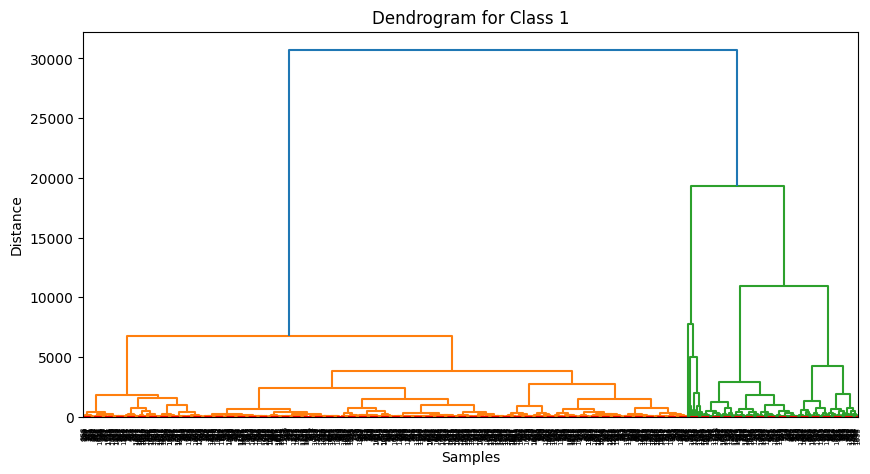

In [ ]:
# Generate linkage matrix for Class 0
Z = linkage(X_1, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Class 1")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
Z = linkage(X_1, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")


Number of clusters: 4


or

In [ ]:
hc_0 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_0 = hc_0.fit_predict(X_0)

hc_1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_1 = hc_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")


Class 0 - Cluster 0: 6852 samples
Class 0 - Cluster 1: 15560 samples
Class 1 - Cluster 0: 269 samples
Class 1 - Cluster 1: 953 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.' + str(i+1) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.' + str(i+1) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")

Spectral Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
def run_spectral_clustering(X_data, class_label):
    best_score = -1
    best_k = None
    best_labels = None

    # Search for the best number of clusters
    for k in range(2, 7):
        sc = SpectralClustering(
            n_clusters=k,
            affinity='nearest_neighbors',  # or 'rbf'
            assign_labels='kmeans',
            random_state=42
        )
        labels = sc.fit_predict(X_data)
        score = silhouette_score(X_data, labels)
        print(f"Class {class_label} | n_clusters={k}, Silhouette Score={score:.4f}")

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    print(f"Best n_clusters for Class {class_label}: {best_k} (Silhouette Score={best_score:.4f})")
    return best_labels, best_k, best_score



In [ ]:
# ---- Run Spectral Clustering with automatic k selection ----
sub_labels_0, best_k_0, best_score_0 = run_spectral_clustering(X_0, class_label=0)
sub_labels_1, best_k_1, best_score_1 = run_spectral_clustering(X_1, class_label=1)

Class 0 | n_clusters=2, Silhouette Score=0.5437
Class 0 | n_clusters=3, Silhouette Score=0.3796
Class 0 | n_clusters=4, Silhouette Score=0.3919
Class 0 | n_clusters=5, Silhouette Score=0.3835
Class 0 | n_clusters=6, Silhouette Score=0.3804
Best n_clusters for Class 0: 2 (Silhouette Score=0.5437)
Class 1 | n_clusters=2, Silhouette Score=0.6686
Class 1 | n_clusters=3, Silhouette Score=0.5090
Class 1 | n_clusters=4, Silhouette Score=0.3246
Class 1 | n_clusters=5, Silhouette Score=0.4022
Class 1 | n_clusters=6, Silhouette Score=0.3910
Best n_clusters for Class 1: 2 (Silhouette Score=0.6686)


In [ ]:
# Show cluster counts
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 18280 samples
Class 0 - Cluster 1: 4132 samples
Class 1 - Cluster 0: 937 samples
Class 1 - Cluster 1: 285 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.' + str(i+1) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.' + str(i+1) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [ ]:
n_clusters_0 = 4
mbk_0 = MiniBatchKMeans(
    n_clusters=n_clusters_0,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_0 = mbk_0.fit_predict(X_0)

n_clusters_1 = 3
mbk_1 = MiniBatchKMeans(
    n_clusters=n_clusters_1,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_1 = mbk_1.fit_predict(X_1)



In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 5140 samples
Class 0 - Cluster 1: 7617 samples
Class 0 - Cluster 2: 8136 samples
Class 0 - Cluster 3: 1519 samples
Class 1 - Cluster 0: 214 samples
Class 1 - Cluster 1: 969 samples
Class 1 - Cluster 2: 39 samples


In [ ]:
df_0 = X_0.copy()
df_0['Is Fraudulent'] = 0
df_0['Cluster_Label'] = ['0.' + str(i+1) for i in sub_labels_0]

df_1 = X_1.copy()
df_1['Is Fraudulent'] = 1
df_1['Cluster_Label'] = ['1.' + str(i+1) for i in sub_labels_1]

final_df = pd.concat([df_0, df_1], ignore_index=True)

# Export result
final_df.to_csv('Clustered_fraudulent.csv', index=False)
print("Saved as Clustered_fraudulent.csv")